### Numpy Tutorial

1. Mandatory pre-requisite reading: Chapter 4 from "Python for Data Science Handbook" by Jake Vandasplas
2. Numpy Documentation: https://numpy.org/doc/stable/
2. User Guide & API Reference
3. Watch out for the version of numpy you are using and the documentation you are referring

#### 1. Background on Python data types

##### 1.1 Simple data types

In [1]:
# Python numbers are inferred, Numpy numbers can be inferred or specified 
counter = 0

# We can provide PEP484 type hints.
# NOTE: This is for human readability only
# Python wont complain even if you put a invalid type hint
counter: int = 0

# Python is implemented in C
# A Data Type in Python is a data structure in C

# We can find the memory location of a python variable like this
id(counter)


2370333638864

In [2]:
print(f"Memory address of counter variable is {id(counter)}") 

# what is the size of int datatype in bytes?
import sys
sys.getsizeof(counter) #whopping 24 (28) bytes (not bits) to store a number !!!!

Memory address of counter variable is 2370333638864


24

##### 1.2 Collection data types

In [3]:
# Python list can hold mixed type of data 
# Data may not be stored sequentially stored at different locations 
l = [1,2,3,4,5,'abc']

#### Let us do something destructive

In [4]:
a = list()
a.append("Hello")
type(a)

list = "Hello"
b = list() #Can you tell why this line gives errors?

TypeError: 'str' object is not callable

##### Do you want to do something even more destructive?

In [5]:
x = 10
y = str(10)
print(y)

str = "hello world"
y = str(10)

10


TypeError: 'str' object is not callable

### Moral of the Story

1. Do not name your variable/function with python functions or datatype names
2. Python will not complain if you do so.
3. But from that point onwards, your python will be completely messed. 
4. Every invocation may get redirected to the re-definition

5. Also do not reuse variable and function names in your own application space

### Finding the length of a collection data type

In [6]:
l = [1,2,3,4,5,'abc']

print(len(l)) #len() function is implemented by many python types and data structures

# Check the memory address of adjacent items in list. Are they adjacent in memory?
print(id(l[0]))
print(id(l[1]))

6
2370333638896
2370333638928


In [7]:
# Second verification if list items are contiguous 
# Lets find the size of each item 
# Then see if the above memory address for l[0] and l[1] are contiguous 
sys.getsizeof(l[0]) 

28

##### 1.3 Python dense array

1. Gives efficient storage compared to List
2. But no efficient operations

In [8]:
import array

list2 = [1,2,3,4,5] # A list with same data type

darray = array.array("i", list2) # here i stands for integer data type
darray

array('i', [1, 2, 3, 4, 5])

In [9]:
sys.getsizeof(darray[0])

28

In [10]:
from IPython.display import Image
Image(url="https://www.softwaretestinghelp.com/wp-content/qa/uploads/2021/04/fig2_syntax.png")

#### 2. Starting with Numpy

In [11]:
import numpy as np

In [12]:
np.__version__ #Check the numpy version for sanity check

'1.23.3'

##### 2.1 numpy data types

1. numpy maintains a separate set of data types other than python
2. There are around 24 data types in all (in latest version of numpy) - See Jake Vanderplas 4th chapter as you read later

In [13]:
Image(url="https://numpy.org/doc/stable/_images/dtype-hierarchy.png")

##### 2.2 numpy creation with inferred data type 

In [14]:
a = np.array([1,2,3,5,-8]) #Data type of individual entries is inferred automatically

In [15]:
print(type(a)) # print the data type of the numpy array

print(type(a[0])) # print the data type of first element numpy array

# Alternate way of getting the data type of entries of numpy array
print(a.dtype)

<class 'numpy.ndarray'>
<class 'numpy.int32'>
int32


In [16]:
b = np.array([1.0, 2.0, 3.0]) #data type is inffered to be float due to the decimal point
b.dtype

dtype('float64')

##### 2.3 Cautionary Digression: Printable representation are never indication of data type  

In [17]:
a

array([ 1,  2,  3,  5, -8])

In [18]:
# Output of print function on a numpy array is very misleading
# Output makes you feel as if it is a list, but it is not
print(a)  

[ 1  2  3  5 -8]


In [19]:
# Lets do a print and repr on a list to compare
int_list = [ 1,  2,  3,  5, -8]

print(int_list)
int_list

[1, 2, 3, 5, -8]


[1, 2, 3, 5, -8]

##### 2.4 Explicitly specifying data types

In [20]:
# create an array of specified type
b = np.array([1, 2, 3], dtype='f')

print(f"b.dtype={b.dtype}") #This will show float32
b

b.dtype=float32


array([1., 2., 3.], dtype=float32)

In [21]:
b

array([1., 2., 3.], dtype=float32)

In [22]:
a = np.array([1,2,3,5,-8])
a.astype(np.float) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_37420\19622583.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a.astype(np.float)


array([ 1.,  2.,  3.,  5., -8.])

In [23]:
# Turn the int array into float array
a.astype(float) 

array([ 1.,  2.,  3.,  5., -8.])

In [24]:
# what happened here. Why is numpy array a not showing as float anymore 
# hint: astype() operation is not a in place modification
a 

array([ 1,  2,  3,  5, -8])

In [25]:
# Correct way 
new_arr = a.astype(float)
new_arr

array([ 1.,  2.,  3.,  5., -8.])

##### 2.5 Why so much stress on data type?

In [26]:
import pandas as pd

df = pd.DataFrame({
        "intfield1":[4,5,6,10,12],
        "intfield2":[100,101,102,103,104],
        "floatfield1":[4.0,5.0,6,10,12],
        "floatfield2":[9.0,10.0,11,12,13],
        "intfield3":[95,96,97,98,98]
        })
df

,intfield1,intfield2,floatfield1,floatfield2,intfield3
0,4,100,4.0,9.0,95
1,5,101,5.0,10.0,96
2,6,102,6.0,11.0,97
3,10,103,10.0,12.0,98
4,12,104,12.0,13.0,98


In [27]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   intfield1    5 non-null      int64  
 1   intfield2    5 non-null      int64  
 2   floatfield1  5 non-null      float64
 3   floatfield2  5 non-null      float64
 4   intfield3    5 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 328.0 bytes


In [28]:
data = np.array([
        (4,100,4.0,9.0,95),(5,101,5.0,10.0,96), (6,102,6.0,11,97), 
        (10,103,10.0,12,98), (12,104,12.0,13,98)],
    dtype=[("intfield1", "i1"), ("intfield2", "i1"), ("floatfield1", 'f2'), 
            ("floatfield2", 'f2'),("intfield3", "i1")])
df = pd.DataFrame(data, columns=["intfield1", "intfield2", "floatfield1", "floatfield2", "intfield3"])
df

,intfield1,intfield2,floatfield1,floatfield2,intfield3
0,4,100,4.0,9.0,95
1,5,101,5.0,10.0,96
2,6,102,6.0,11.0,97
3,10,103,10.0,12.0,98
4,12,104,12.0,13.0,98


In [29]:
df.info(memory_usage="deep") #50% savings in data compared to inferred type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   intfield1    5 non-null      int8   
 1   intfield2    5 non-null      int8   
 2   floatfield1  5 non-null      float16
 3   floatfield2  5 non-null      float16
 4   intfield3    5 non-null      int8   
dtypes: float16(2), int8(3)
memory usage: 163.0 bytes


### 3. Numpy Vector operations

##### 3.1 Create a column vector and calculate transpose

There is confusion about shapes for column and row vectors if not done right

In [30]:
a = np.array([1,2,3,5,-8])
print(a.shape)
a

(5,)


array([ 1,  2,  3,  5, -8])

In [31]:
a_transpose = a.T  # This transpose never works. why?
print(a_transpose.shape)
a_transpose

(5,)


array([ 1,  2,  3,  5, -8])

In [32]:
a = np.array([1,2,3,5,-8]).reshape(-1,1)
print(a.shape)
print(a)
a

(5, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 5]
 [-8]]


array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [-8]])

In [33]:
a_transpose = a.T  # This transpose works. why?
print(a_transpose.shape)
a_transpose

(1, 5)


array([[ 1,  2,  3,  5, -8]])

##### 3.2 Creating a 2D numpy array

In [34]:
a = np.array([[1, 2, 3], [4, 5, 6]])

# Display the array
print(a)

# Attributes of the array
# Shape of the array
print(a.shape)

# Data type of array elements
print(a.dtype)

# What type of object is the variable 'a'?
print(type(a))

[[1 2 3]
 [4 5 6]]
(2, 3)
int32
<class 'numpy.ndarray'>


In [35]:
# Flatten a 2D array
# Question: Where will this be possibly used?
a = np.array([[1, 2, 3], [4, 5, 6]])
a_flat = a.flatten()
print(a_flat.shape)
a_flat

(6,)


array([1, 2, 3, 4, 5, 6])

In [37]:
# Flatten a 2D array
# Where will this be possibly used?
a = np.array([[1, 2, 3], [4, 5, 6]])
a_colvector = a.reshape(-1,1) #Fill this
print(a_colvector.shape)
a_colvector

(6, 1)


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [38]:
print(a_colvector.reshape(3,2)) # 3x2 matrix
print(a_colvector.reshape(2,3)) # 2x3 matrix
print(a_colvector.reshape(1,6)) #row vector

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[[1 2 3 4 5 6]]


##### 3.3 1D array indexing in numpy


In [39]:
a = np.array([1, 2, 3, 4, 5])

print(a)

print(a[0])
print(a[1])

print(a[-1]) # first element from the tail of the array
print(a[-2]) # second element from the tail of the array

#print(a[5]) # throws an error

[1 2 3 4 5]
1
2
5
4


##### 3.4 2D array indexing in numpy

In [40]:
a = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print(a)
print('----')
print(a[0, 0])
print(a[-1, 0])
print(a[0, -1])
print(a[-1, -1])

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
----
1
7
2
8


##### 3.5 Digression - for looping in python on list

1. Direct looping over list
2. Looping with range
3. Looping with enumerate

In [41]:
# direct list iteration
lst = [1,2,3,4,5,'abc']

for i in lst:
    print(i, end = " ")

print("\n")

print(f"length = {len(lst)}")

#we can access 

1 2 3 4 5 abc 

length = 6


In [42]:
# what does range do
# iterates from starting point to one less than specifed value
# C equivalent is for(i = 0; i< 3; i++)
for i in range(3):
    print(i, end=" ")

0 1 2 

In [43]:
lst = [1,2,3,4,5,'abc']

# Using range without a starting point
# uses 0 as the starting point
for i in range(len(lst)):
    print(lst[i], end=" ")

print("\n")

# Using range with a starting point
for i in range(3, len(lst)):
    print(lst[i], end=" ")

print("\n")

# Using range with a starting, ending point and step size
for i in range(2, len(lst), 2):
    print(lst[i], end=" ")


1 2 3 4 5 abc 

4 5 abc 

3 5 

In [44]:
lst = [1,2,3,4,5,'abc']
for x in enumerate(lst):
    print(x, end=" ")

(0, 1) (1, 2) (2, 3) (3, 4) (4, 5) (5, 'abc') 

In [45]:
# Using enumerate gives access to the index variable
for i, item in enumerate(lst): #Format for unpacking a tuple format
    print(lst[i], end=" ")

1 2 3 4 5 abc 

In [46]:
# Using zip function to iterate two related sequences
# Usage: zip(iterator1, iterator2, iterator3 ...)

people = ["Vishwas", "Akarsh", "Mohit", "Aditya", "Rakshit"]
salary_in_lakhs = [19, 9.5, 10, 12, 14]

for person, salary in zip(people, salary_in_lakhs):
    print(f"{person} {salary} lakhs")

Vishwas 19 lakhs
Akarsh 9.5 lakhs
Mohit 10 lakhs
Aditya 12 lakhs
Rakshit 14 lakhs


##### 3.5 python list slicing

1. Can be done for anything iterable - including strings

In [47]:
#slicing a list 
lst = [1,2,3,4,5,'abc']
lst_first_3 = lst[0:3]
lst_first_3

[1, 2, 3]

In [48]:
#slicing a list with steps
lst = [1,2,3,4,5,'abc']
lst_jump2 = lst[0::2]
lst_jump2

[1, 3, 5]

In [49]:
#slicing and skip last
lst = [1,2,3,4,5,'abc']
lst_skiplast = lst[0:-1]
lst_skiplast

[1, 2, 3, 4, 5]

In [50]:
#reversing
lst = [1,2,3,4,5,'abc']
lst_reverse = lst[::-1]
lst_reverse

['abc', 5, 4, 3, 2, 1]

##### 3.6 1D array slicing in numpy

In [51]:
a = np.array([1, 2, 3, 4, 5])

print(a)

print('-----')

# Get all elements of the array
print(a[:])

# Specify a slice with start and end indices
print(a[:3])
print(a[1:3])
print(a[2:])
print(a[:-1]) # skips the tail element of the array

print(a[-3:-1])

[1 2 3 4 5]
-----
[1 2 3 4 5]
[1 2 3]
[2 3]
[3 4 5]
[1 2 3 4]
[3 4]


In [52]:
print(a[0:-1:2]) # start from first element, skip the last element, jump by 2
print(a[0::2]) # start from first element, include the last element, jump by 2

[1 3]
[1 3 5]


##### 3.7 Slicing 2D array (2D Data Matrix) as features and samples

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

**Vectors from the data matrix**

![Patient dataset](https://bl3302files.storage.live.com/y4mTMCQdiTnIFj1IALg09CRz7pPWl0g4HpigAPbwyMmF0QNliGAgK3aEsBESo0BNFCy-0-kR6pllskO1DPVt2-76bYsQaACRWhkOebqJ545BbtWcGr1CJG72BZJPrYbQDWNAC0h1EHhpewBlORT_xtahEu-bite73OVi-4CzGeQf6GDw11H6kn72VocdC2bLAsJ?width=256&height=167&cropmode=none)

1st feature vector (heart rate) for all patients:
$$x_1 = \begin{bmatrix}76\\74\\72\\78\end{bmatrix}$$

1st patient vector for all features:
$$x^{(1)} = \begin{bmatrix}76\\126\\38\end{bmatrix}$$

Therefore Patient Matrix can be written as 
$$ \begin{bmatrix} {x^{(1)}}^T \\ {x^{(2)}}^T \\  {x^{(3)}}^T \\  {x^{(4)}}^T \end{bmatrix}$$

In [53]:
import pandas as pd

In [54]:
## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

df_patient.head()


,HR,BP,Temp
0,76,126,38.0
1,74,120,38.0
2,72,118,37.5
3,78,136,37.0


In [55]:
print(df_patient.shape)

(4, 3)


In [56]:
X = np.array(df_patient)
print(X)

[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]


In [57]:
# Slice the features
print(X[:, 0]) # first feature vector
print(X[:, 0].shape)

# Slice the samples
print(X[1, :]) # second sample vector with label
print(X[1, :-1]) # second sample vector without its label
print(X[1, :].shape)

# Slice the output labels
print(X[:2, -1])# output label for samples 1 and 2

[76. 74. 72. 78.]
(4,)
[ 74. 120.  38.]
[ 74. 120.]
(3,)
[38. 38.]


##### 3.8 Load a real dataset and apply slicing

In [58]:
#Use a publicly available CSV format dataset to load directly in Pandas
df_pima = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
# If the above approach didnt work, then download the file from here
# https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.data.csv

In [60]:
Xy = df_pima.to_numpy()
print(Xy.shape)
Xy[0:5,:]

(768, 9)


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

In [61]:
# Split the combined dataset containing predictor variables and target variable
# into predictor only and target only

X = Xy[:,:-1] # Extracting predictors/features
y = Xy[:,-1] # Right way to extract target variable (unfortunately)
y_alt = Xy[:,-1:] #Can you recall how does this method extract target?

print(X.shape) #Check the shape should be one less than Xy combined
print(y.shape)
print(y_alt.shape)

(768, 8)
(768,)
(768, 1)


### 4. Lets do some visualization

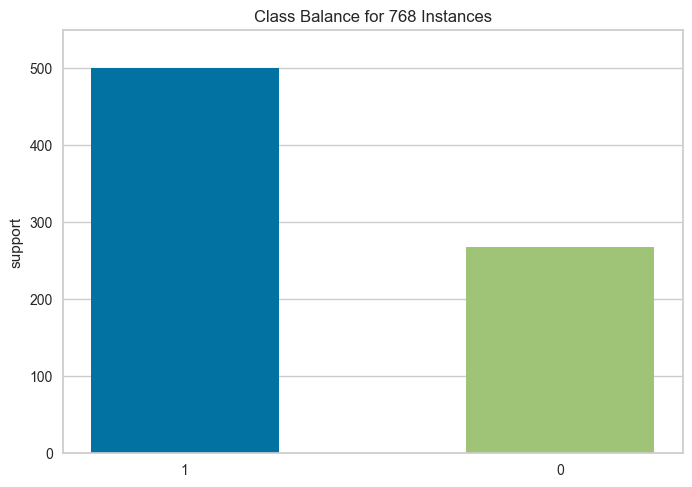

<Axes: title={'center': 'Class Balance for 768 Instances'}, ylabel='support'>

In [62]:
# Why is this important?
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=[1, 0])
visualizer.fit(y) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

### 4. Apply Logistic Regression on the diabetes dataset

In [63]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X,y) #Do you recall this fit method as the training phase?

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
# We will restrict to these predictors "Pregnancies", "Glucose","BloodPressure"
# These are first three columns in dataset. Their indexes are 0,1,2
#Do you recall this fit method as the training phase?
lr_classifier = LogisticRegression()
lr_classifier.fit(X[:,0:3],y_alt) # This fails with a self explanatory error. Fix this

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:
# Predict phase
## Defining the y_pred variable for the predicting values. 
y_pred=lr_classifier.predict(X) #Can you think why this is failing?

ValueError: X has 8 features, but LogisticRegression is expecting 3 features as input.

In [66]:
y_pred=lr_classifier.predict(X[:,0:3]) # y had actual values, y_pred has predicted values
y_pred.shape

(768,)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.75

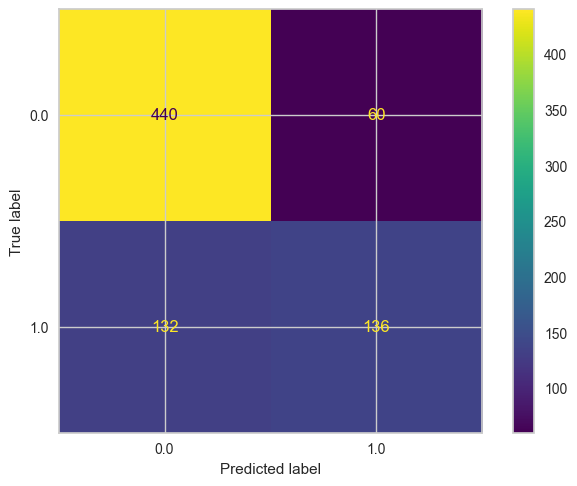

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred, labels=lr_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_classifier.classes_)
disp.plot()
plt.show()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       500
         1.0       0.69      0.51      0.59       268

    accuracy                           0.75       768
   macro avg       0.73      0.69      0.70       768
weighted avg       0.74      0.75      0.74       768



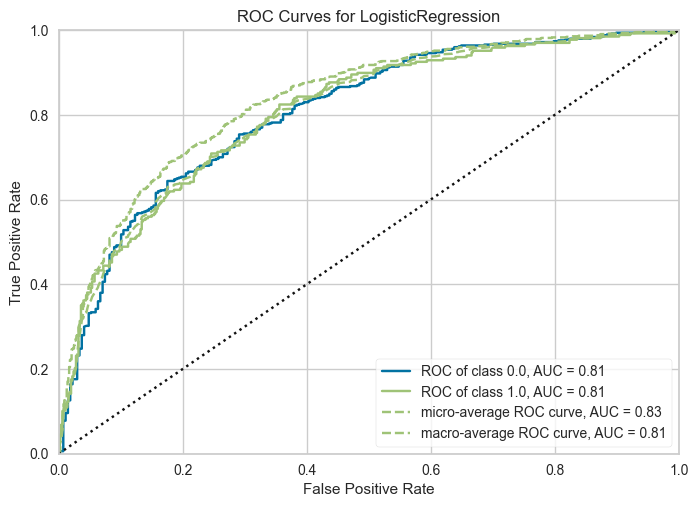

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [70]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr_classifier, classes=lr_classifier.classes_)
visualizer.fit(X[:,0:3], y)        
visualizer.score(X[:,0:3], y)        
visualizer.show() 

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


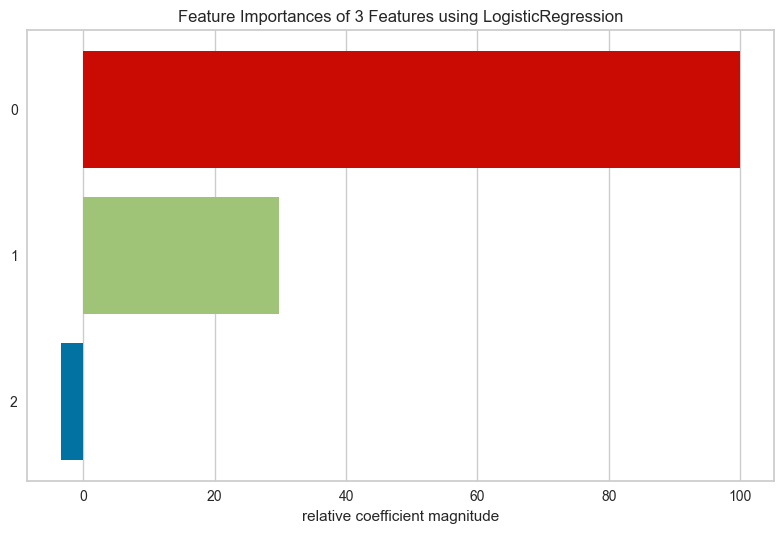

<Axes: title={'center': 'Feature Importances of 3 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [71]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(lr_classifier)
viz.fit(X[:,0:3], y)
viz.show()

### Homework:
1. Given that the feature importance are as shown in the plot generated in the above cell, use Pregnancies alone and do a Logistic regression. Compare the metrics for what has been done

### We are not done yet. What is coming?

The following are tentative topics for the next 2 labs.
Some like pipeline will be moved out after implementation of 1 or 2 algorithms to emphasise the need for pipelines.

1. We ran the above fit-predict on the same set of data X. We need test train split
2. How to shuffle data randomly
3. We have not seen how multiple numpy arrays can be stacked horizontally or vertically
4. Tensors - 3D
5. Reduction operations on different axis
6. sort, argsort
7. scipy
8. Numpy broadcasting
9. Ufuncs, 
10. vectorization. why is it very important
11. Using datasets built into Pandas
12. Some more frequently used Pandas operations
13. Very basic plotting directly from Pandas, matplotlib, and seaborn
14. use of meshgrid in plotting, subplots
15. Exploratory Data Analysis (Template will be provided) - Stats, Transformations, Imputations, Feature Selections, Extractions, Engin
16. Extensive sklearn pipeline construction, familiarizing with sklearn class inheritance 
17. Tensorflow basic operations (outside of Deep learning)
18. Interpreting accuracy scores